# Credit Risk Analysis – Kaggle Notebook
This notebook contains the data loading, cleaning and exploratory analysis used to build my Looker Studio risk dashboard.

## Step 1: Load the Dataset
We begin by importing the necessary libraries and loading the credit risk dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv(r'/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')

## Step 2: Data Overview
We check the structure of the dataset, look for missing values and review basic statistics.

In [3]:
# explore the data
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# confirm if there are invalid values in the person_age column
df['person_age'].sort_values(ascending = False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64

In [8]:
# confirm if there are invalid values in the person_emp_length column
df['person_emp_length'].sort_values(ascending = False).head(10)

0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31866     31.0
32263     31.0
31867     31.0
30914     31.0
32562     30.0
Name: person_emp_length, dtype: float64

## Step 3: Data Cleaning
Here we remove duplicates, handle missing and invalid values, and ensure the dataset is ready for analysis.

In [9]:
#Eliminate invalid valies whose age are over 120
df = df.drop([32297, 81, 183, 575, 747])
df['person_age'].sort_values(ascending = False).head(10)
df = df.reset_index(drop = True)

In [10]:
#Eliminate invalid valies whose employemnt lengths are over 120
df = df.drop([0,208])
df = df.reset_index(drop = True)

In [11]:
# fill missing values with median in the person_emp_length column
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [12]:
# fill missing values with median in the loan_int_rate column
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [13]:
# drop duplicated rows
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32409 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32409 non-null  int64  
 1   person_income               32409 non-null  int64  
 2   person_home_ownership       32409 non-null  object 
 3   person_emp_length           32409 non-null  float64
 4   loan_intent                 32409 non-null  object 
 5   loan_grade                  32409 non-null  object 
 6   loan_amnt                   32409 non-null  int64  
 7   loan_int_rate               32409 non-null  float64
 8   loan_status                 32409 non-null  int64  
 9   loan_percent_income         32409 non-null  float64
 10  cb_person_default_on_file   32409 non-null  object 
 11  cb_person_cred_hist_length  32409 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


## Step 4: Exploratory Analysis (EDA)
Here we analyze income, DTI, home ownership and age.
Grouping for income, DTI and Age is performed inside this section as part of the analysis.

In [15]:
## Exploratory Analysis Questions
#Done 1. Which loan purpose is the most common? 
#Done 2. Lower income groups increase the risk?
#Done 3. Are certain age group riskier?
#Done 4. Does debt-to-income ratio impact default?
#Done 5. How employement length affects the risk?
#Done 6. Do having more independent increase the risk?

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.761424,9592.486655,11.014512,0.218705,0.170248,5.811194
std,6.210445,5.251787e+04,3.983757,6320.885127,3.083104,0.413374,0.106785,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
df.nunique()

person_age                      56
person_income                 4294
person_home_ownership            4
person_emp_length               35
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

<Axes: xlabel='loan_intent'>

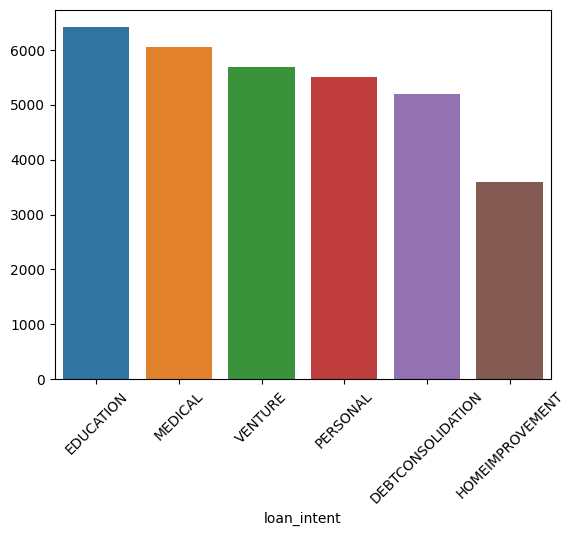

In [18]:
# Question 1: which loan purpose is the most common?
plt.xticks(rotation = 45)
sns.barplot(x = df['loan_intent'].value_counts().index, y = df['loan_intent'].value_counts().values)

## A short observation here
# Education is the most common purpose.
# They can't pay until they graduate from their school.

In [19]:
## Question 2: Lower income groups increase the risk?
# compare average income
df.groupby('loan_status')['person_income'].mean().rename(index = {0: 'Non default', 1: 'Default'})

loan_status
Non default    70597.359070
Default        49093.100451
Name: person_income, dtype: float64

In [20]:
# Comepare the risk by income range
# person_income >= 0, person_income < 10000
income_e4 = len(df[(df['person_income'] >= 0) & (df['person_income'] < 10000)]['person_income'])
income_default_e4 = len(df[(df['person_income'] >= 0) & (df['person_income'] < 10000) & (df['loan_status'] == 1)]['person_income'])
default_ratio_e4 = income_default_e4 / income_e4 * 100
# person_income >= 10000, person_income < 100000
income_e5 = len(df[(df['person_income'] >= 10000) & (df['person_income'] < 100000)]['person_income'])
income_default_e5 = len(df[(df['person_income'] >= 10000) & (df['person_income'] < 100000) & (df['loan_status'] == 1)]['person_income'])
default_ratio_e5 = income_default_e5 / income_e5 * 100
# person_income >= 100000, person_income < 1000000
income_e6 = len(df[(df['person_income'] >= 100000) & (df['person_income'] < 1000000)]['person_income'])
income_default_e6 = len(df[(df['person_income'] >= 100000) & (df['person_income'] < 1000000) & (df['loan_status'] == 1)]['person_income'])
default_ratio_e6 = income_default_e6 / income_e6 * 100
# person_income >= 1000000
income_e7 = len(df[(df['person_income'] >= 1000000)]['person_income'])
income_default_e7 = len(df[(df['person_income'] >= 1000000) & (df['loan_status'] == 1)]['person_income'])    
default_ratio_e7 = income_default_e7 / income_e7 * 100

print('The risk of default devided by income range')
print('person_income >= 0, person_income < 10000: {}%'.format(round(default_ratio_e4,6)))
print('person_income >= 10000, person_income < 100000: {}%'.format(round(default_ratio_e5,6)))
print('person_income >= 100000, person_income < 1000000: {}%'.format(round(default_ratio_e6,6)))
print('person_income >= 1000000: {}%'.format(round(default_ratio_e7,6)))

## A short observation here
# The average income of people who are default is lower than the one of them who aren't default.
# The lowest range of income has the highest risk.

The risk of default devided by income range
person_income >= 0, person_income < 10000: 84.722222%
person_income >= 10000, person_income < 100000: 23.821519%
person_income >= 100000, person_income < 1000000: 8.966733%
person_income >= 1000000: 0.0%


<Axes: title={'center': 'The default risk depend on income range'}, xlabel='Income range', ylabel='The default risk'>

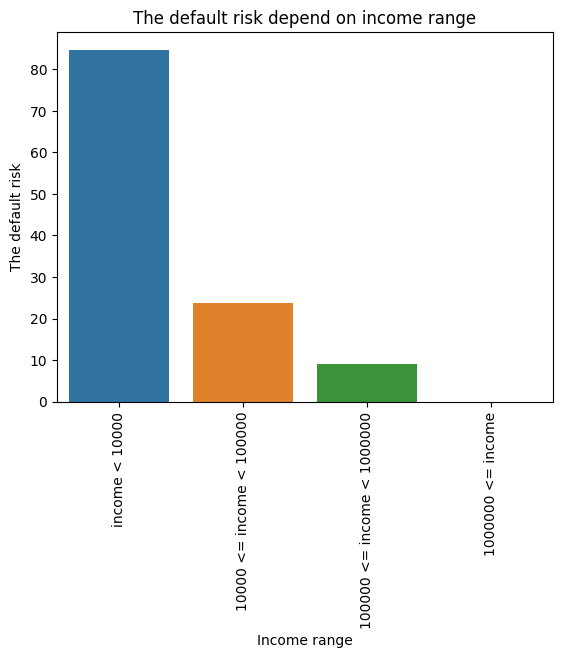

In [21]:
income = pd.Series([default_ratio_e4, default_ratio_e5, default_ratio_e6, default_ratio_e7], index = ['income < 10000', '10000 <= income < 100000', '100000 <= income < 1000000', '1000000 <= income'])
plt.xticks(rotation = 90)
plt.title('The default risk depend on income range')
plt.xlabel('Income range')
plt.ylabel('The default risk')
sns.barplot(x = income.index, y = income.values)

In [22]:
# Question 3: Are certain age group riskier?
# compare average age
df.groupby('loan_status')['person_age'].mean().rename(index = {0: 'Non default', 1: 'Default'})

loan_status
Non default    27.802298
Default        27.475169
Name: person_age, dtype: float64

In [23]:
# Comepare the risk by certain age groups
# person_income < 30
age_20s_to_30s = len(df[(df['person_age'] < 30)]['person_age'])
age_default_20s_to_30s = len(df[(df['person_age'] < 30) & (df['loan_status'] == 1)]['person_age'])
default_racio_20s_to_30s = age_default_20s_to_30s / age_20s_to_30s * 100
# person_age >= 30, person_income < 50
age_30s_to_50s = len(df[(df['person_age'] >= 30) & (df['person_age'] < 50)]['person_age'])
age_default_30s_to_50s = len(df[(df['person_age'] >= 30) & (df['person_age'] < 50) & (df['loan_status'] == 1)]['person_age'])
default_racio_30s_to_50s = age_default_30s_to_50s / age_30s_to_50s * 100
# person_age >= 50
age_over_50s = len(df[(df['person_age'] >= 50)]['person_age'])
age_default_over_50s = len(df[(df['person_age'] >= 50) & (df['loan_status'] == 1)]['person_age'])
default_racio_over_50s = age_default_over_50s / age_over_50s * 100

print('The risk of default devided by age')
print('person_age < 30: {}%'.format(round(default_racio_20s_to_30s,6)))
print('person_age >= 30, person_age < 50: {}%'.format(round(default_racio_30s_to_50s,6)))
print('person_age >= 50: {}%'.format(round(default_racio_over_50s,6)))

## A short observation here
# People who are default are youger than the ones who aren't.
# People who are older than 50 y.o. are have the highest risk.

The risk of default devided by age
person_age < 30: 22.421026%
person_age >= 30, person_age < 50: 20.259412%
person_age >= 50: 25.373134%


In [24]:
## Question 4: Does debt-to-income ratio impact default?
# compare average racio
df.groupby('loan_status')['loan_percent_income'].mean().rename(index = {0: 'Non default', 1: 'Default'})

loan_status
Non default    0.148803
Default        0.246858
Name: loan_percent_income, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Debt to income ratio', ylabel='Number of people'>

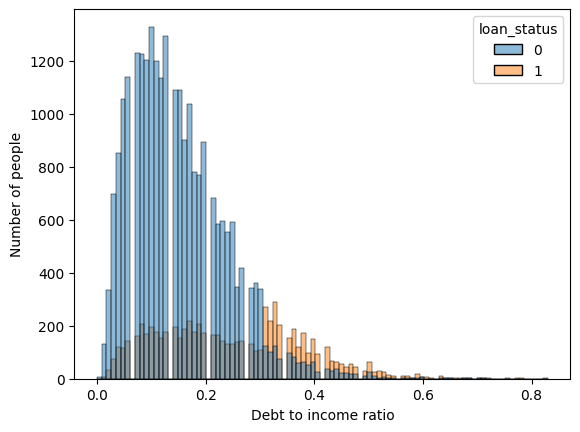

In [25]:
plt.xlabel('Debt to income ratio')
plt.ylabel('Number of people')
sns.histplot(data = df, x = 'loan_percent_income', hue = 'loan_status')

In [26]:
## A short observation here
# The debt to income ratio of people who are default are higher than the others
# The higher debt-to-income ratio is, The more people get defalut.

In [27]:
## Question 5: How employement length affects the risk?
# compare average racio
df.groupby('loan_status')['person_emp_length'].mean().rename(index = {0: 'Non default', 1: 'Default'})

loan_status
Non default    4.942617
Default        4.114137
Name: person_emp_length, dtype: float64

In [28]:
# Comepare the risk by employement length
# person_emp_length < 10
emp_length_10 = len(df[(df['person_emp_length'] < 10)]['person_emp_length'])
emp_length_default_10 = len(df[(df['person_emp_length'] < 10) & (df['loan_status'] == 1)]['person_emp_length'])
default_racio_10 = emp_length_default_10 / emp_length_10 * 100
# person_emp_length >= 10, person_emp_length < 30
emp_length_10_to_30 = len(df[(df['person_emp_length'] >= 10) & (df['person_emp_length'] < 30)]['person_emp_length'])
emp_length_default_10_to_30 = len(df[(df['person_emp_length'] >= 10) & (df['person_emp_length'] < 30) & (df['loan_status'] == 1)]['person_emp_length'])
default_racio_10_to_30 = emp_length_default_10_to_30 / emp_length_10_to_30 * 100
# person_emp_length >= 30
emp_length_over_30 = len(df[(df['person_emp_length'] >= 30)]['person_emp_length'])
emp_length_default_over_30 = len(df[(df['person_emp_length'] >= 30) & (df['loan_status'] == 1)]['person_emp_length'])
default_racio_over_30 = emp_length_default_over_30 / emp_length_over_30 * 100

print('The risk of default devided by employement length')
print('person_emp_length < 10: {}%'.format(round(default_racio_10,6)))
print('person_emp_length >= 10, person_emp_length < 30: {}%'.format(round(default_racio_10_to_30,6)))
print('person_emp_length >= 30: {}%'.format(round(default_racio_over_30,6)))

## A short observation here
# The empolyement lenghts of people who are default are shorter than the non defalt ones.
# People whose employement lengths are more than 10 years and less than 30 years have the lowest risk.

The risk of default devided by employement length
person_emp_length < 10: 22.557461%
person_emp_length >= 10, person_emp_length < 30: 16.370206%
person_emp_length >= 30: 22.222222%


In [29]:
## Question 6: Do having more independent increase the risk?
# compare risks devided by borrower's situation
# person_home_ownership = 'MORTGAGE'
mortgage = len( df[df['person_home_ownership'] == 'MORTGAGE']['person_home_ownership'] )
default_mortgage = len( df[(df['person_home_ownership'] == 'MORTGAGE') & (df['loan_status'] == 1)]['person_home_ownership'] )
default_ratio_mortgage = default_mortgage / mortgage * 100
# person_home_ownership = 'RENT'
rent = len( df[df['person_home_ownership'] == 'RENT']['person_home_ownership'] )
default_rent = len( df[(df['person_home_ownership'] == 'RENT') & (df['loan_status'] == 1)]['person_home_ownership'] )
default_ratio_rent = default_rent / rent * 100
# person_home_ownership = 'OWN'
own = len( df[df['person_home_ownership'] == 'OWN']['person_home_ownership'] )
default_own = len( df[(df['person_home_ownership'] == 'OWN') & (df['loan_status'] == 1)]['person_home_ownership'] )
default_ratio_own = default_own / own * 100
# person_home_ownership = 'OTHER'
other = len( df[df['person_home_ownership'] == 'OTHER']['person_home_ownership'] )
default_other = len( df[(df['person_home_ownership'] == 'OTHER') & (df['loan_status'] == 1)]['person_home_ownership'] )
default_ratio_other = default_other / other * 100

print("The risk of default devided by borrower's situation")
print("person_home_ownership = 'MORTGAGE': {}%".format(round(default_ratio_mortgage,6)))
print("person_home_ownership = 'RENT': {}%".format(round(default_ratio_rent,6)))
print("person_home_ownership = 'OWN': {}%".format(round(default_ratio_own,6)))
print("person_home_ownership = 'OTHER': {}%".format(round(default_ratio_other,6)))

The risk of default devided by borrower's situation
person_home_ownership = 'MORTGAGE': 12.621577%
person_home_ownership = 'RENT': 31.611091%
person_home_ownership = 'OWN': 7.491221%
person_home_ownership = 'OTHER': 31.132075%


<Axes: title={'center': "The risk  based on borrower's situation"}, xlabel="Borrower's situation", ylabel='The ratio of default risk'>

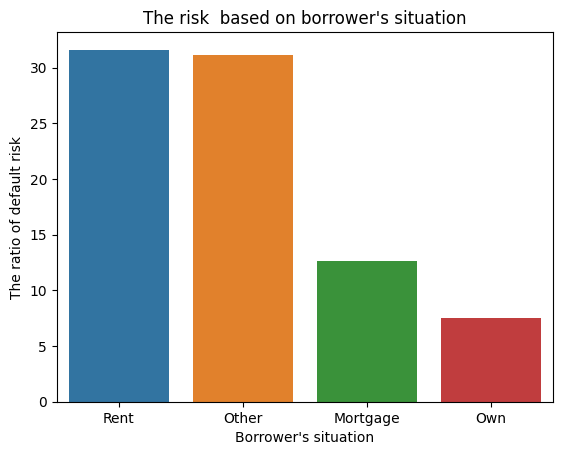

In [30]:
# create bar chart
independent = pd.Series([default_ratio_rent, default_ratio_other, default_ratio_mortgage, default_ratio_own], index = ['Rent', 'Other', 'Mortgage', 'Own'])
plt.title("The risk  based on borrower's situation")
plt.xlabel("Borrower's situation")
plt.ylabel('The ratio of default risk')
sns.barplot(x = independent.index, y = independent.values)

## A short observation here
# people who aren't independent have higher risk.

## Step 5: Key Performance Indicators
We calculate overall default rate, average income and DTI for dashboard use.

In [31]:
## Key Performance Indicators (KPIs)
### 1. default rate
# Description: 
# Code: 
df['loan_status'].mean()*100
# Result (brief observation): 20% of people are default in the data

### 2. default rate by income group
# Description: 
# Code: 
df['income_group'] = pd.cut(df['person_income'], bins = [0, 10000, 100000, 1000000, 10000000])
df.groupby('income_group')['loan_status'].mean()
# Result (brief observation): 80% of people in the lowest income range are default.

### 3. default rate by debt-to-imcome ratio
# Description: 
# Code: 
df['dti_ratio_group'] = pd.cut(df['loan_percent_income'], bins = [0, 0.25, 0.50, 0.75, 1.0])
df.groupby('dti_ratio_group')['loan_status'].mean()
# Result (brief observation): The higher debt-to-income gets, The more people get default.

### 4. default rate by number of dependents
# Description: 
# Code: 
def independence(row):
    if row.person_home_ownership == 'RENT':
        return 'RENT'
    elif row.person_home_ownership == 'OTHER':
        return 'OTHER'
    elif row.person_home_ownership == 'MORTGAGE':
        return 'MORTGAGE'
    elif row.person_home_ownership == 'OWN':
        return 'OWN'
df['independence'] = df.apply(independence, axis = 'columns')
df.groupby('independence')['loan_status'].mean().sort_values(ascending = False)
# Result (brief observation): The people who arent't independent have higher risk.

/tmp/ipykernel_13/3025835179.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_group')['loan_status'].mean()
/tmp/ipykernel_13/3025835179.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('dti_ratio_group')['loan_status'].mean()


independence
RENT        0.316111
OTHER       0.311321
MORTGAGE    0.126216
OWN         0.074912
Name: loan_status, dtype: float64

## Summary
This notebook prepares and explores the credit risk dataset used in the Looker Studio dashboard.
The grouped variables created during EDA help visualize default risk patterns clearly.